1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

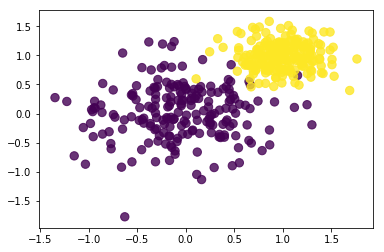

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

/var/folders/nv/28ksfhj10wz9h413w7pr82sc0000gn/T/ipykernel_57560/2155680951.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


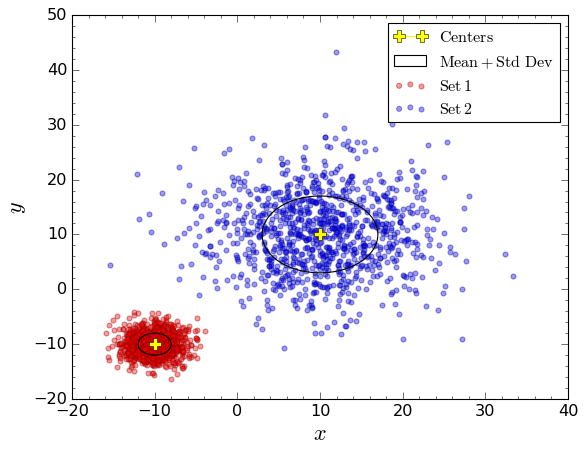

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')


def random2D_2distr(nb_of_elements, mean1, sigma1, mean2, sigma2):
    normal1 = np.random.normal(loc = mean1, scale = sigma1, size = (nb_of_elements, nb_of_elements))
    normal2 = np.random.normal(loc = mean2, scale = sigma2, size = (nb_of_elements, nb_of_elements))
    return normal1, normal2


n = 1000
mean1, sigma1 = -10, 2
mean2, sigma2 = 10, 7

normal1, normal2 = random2D_2distr(n, mean1, sigma1, mean2, sigma2)
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')

ax.scatter(normal1[0, :], normal1[1, :], marker = 'o', color = 'red', edgecolor = "darkred", alpha = 0.4, label = "${\\rm Set\, 1}$")
ax.scatter(normal2[0, :], normal2[1, :], marker = 'o', color = 'blue', edgecolor = "darkblue", alpha = 0.4, label = "${\\rm Set\, 2}$")
ax.set_xlabel("$x$", size = 20); ax.set_ylabel("$y$", size = 20)

ax.plot(mean1, mean1, marker = "P", color = "yellow", markersize = 10, label = "${\\rm Centers}$")
ax.plot(mean2, mean2, marker = "P", color = "yellow", markersize = 10)
CI_normal1 = plt.Circle((mean1, mean1), sigma1, color='black', fill = False, label = "${\\rm Mean} + {\\rm Std\ Dev}$")
CI_normal2 = plt.Circle((mean2, mean2), sigma2, color='black', fill = False)

ax.add_patch(CI_normal1)
ax.add_patch(CI_normal2)

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.legend(loc = "best")
fig.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [3]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [4]:
import pickle
import pandas as pd

# inspection
fileName = "data/residuals_261.pkl"

df = pd.read_pickle(fileName)


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
